Synkrisis: The Bigraph Model Checker
===========================
* * *

A quick introduction
---------------------------------

Synkrisis is a bigraph modelling and engineering toolchain based on BigMC model checker sporting a modular approach.  
It features static analysis for bigraph specification and supports its own transition system and model exporting for DTMC/MDP/LTS analysis.  
Transition graphs output by BigMC can be exported to PRISM and Spot model checkers.  
Since no information is saved across binder sessions, this tool is better suited to get a general idea of the tool and its capabilities.  
Check the original Synkrisis repository to get more info to run this tool locally.

## Resources
More info on:        
* Bigraphs:  https://www.itu.dk/research/pls/wiki/index.php/A_Brief_Introduction_To_Bigraphs  
* Bigmc:     https://github.com/bigmc/bigmc  
* Prism model checker: https://www.prismmodelchecker.org/    
* Spot model checker:  https://spot.lrde.epita.fr/  
* and its HOA format:  https://spot.lrde.epita.fr/concepts.html#hoa  
* Synkrisis: https://github.com/AlessandroCaste/Synkrisis

## Synkrisis Syntax
You can write your bigraph model from file using Synkrisis syntax.
(https://github.com/AlessandroCaste/Synkrisis/wiki/Synkrisis-Syntax) 

This is a general layout of a bigraph model specification:  
`controls`  
`names`  
`rules`  
`model specification`  
`makers`  
`spot-acceptance`  
`prism properties`  
`external properties`  

## How to use this notebook
In order to work and visualize bigraphical models you are only required to edit the following couple of cells: one for file specification and one for execution settings.  
After that, the best way to run analysis is by clicking `Run->Run all cells` from the top-left menu.

Here you can find further sample models: https://github.com/AlessandroCaste/Synkrisis/tree/master/src/test/java/models 
* * *
Specify your model
----------------

Input your bigraph model here:


In [14]:
# Set here the running arguments of your Synkrisis Execution

# Path to the file to be executed
filename = "examples/airport.bigraph"

# The name of the model inside the file (ex: addition)
modelname = "airport"

# Maximum number of execution steps (unlimited is 0)
steps = 0

# Print model and transition file?
printable = True

# Write some .dot file every x steps (default : 0)
frequency = 0

# Translate to the following languages?
prism = False
spot = False

In [15]:
import subprocess

execution = "java -jar Synkrisis.jar -l" + filename
if steps > 0:
    execution += " -m " + steps
if printable: 
    execution += " -G "
if frequency > 0:
    execution += " -r " + frequency
if spot:
    execution += " -o spot "
if prism:
    execution += " -o prism "

result = subprocess.run(execution, stdout=subprocess.PIPE, shell=True, universal_newlines=True)
print(result.stdout)

****************************
Synkrisis Toolchain (2019)
****************************
Use -h command for further help

SYNTAX ANALYSIS STARTED
***********************
[WARNING] The following names are declared and never used: User 
[RESULT : PASSED] Model is ready

BUILDING REPRESENTATION
***********************
[ANALYSIS COMPLETE] Specification has been analyzed

MODEL ANALYSIS
***************
Printing model and reactions

INTERFACING BIGMC
********************
[bigmc::report] [Workqueue size: 0 / Graph size: 6] Number of steps : 7
[bigmc::step] Complete!
[GENERATION : COMPLETE] Transition graph has been generated by the model checker

TRANSITION GRAPH IMPORTING
**************************
Transition graph importing started
Trying to print the transition graph..
Transition file correctly imported
No exporting format has been specified



Visualize your model
---------------------------------

Visualize model and reactions bigraphs

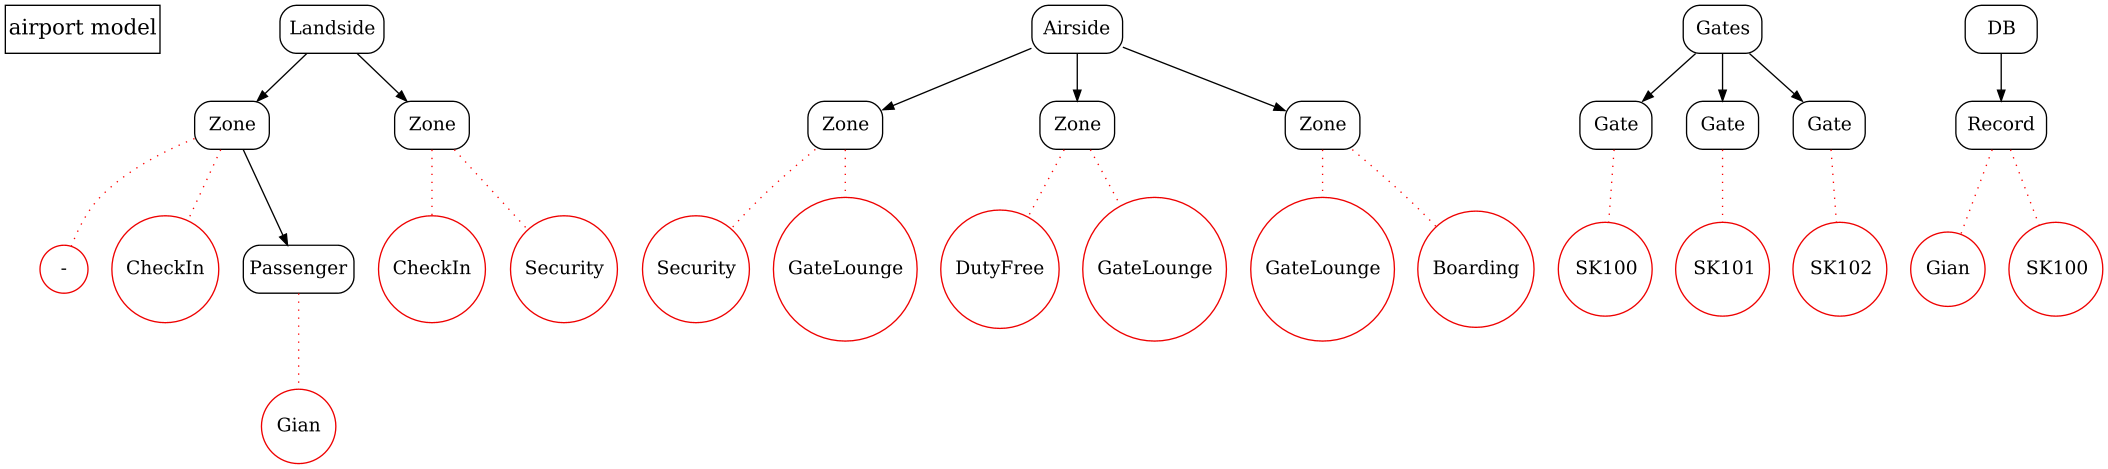

In [16]:
import os
from IPython.display import Image 
if os.path.isfile(modelname + "/" + modelname + ".png"):
    display(Image(modelname + "/" + modelname + ".png")) 
else:
    print("No model picture found")

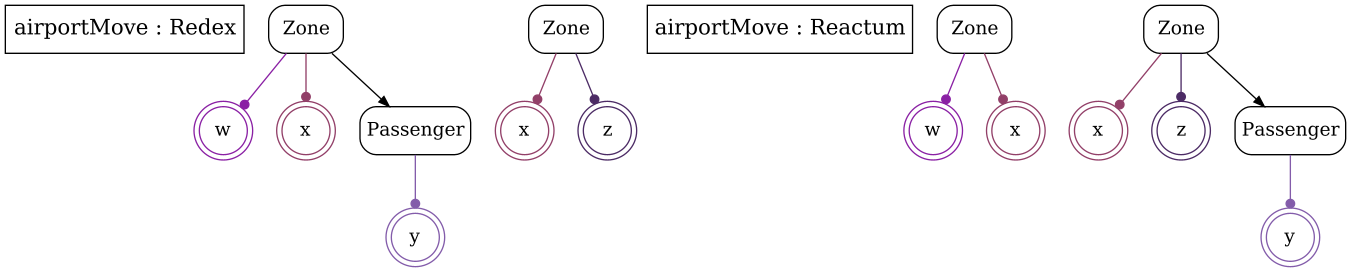

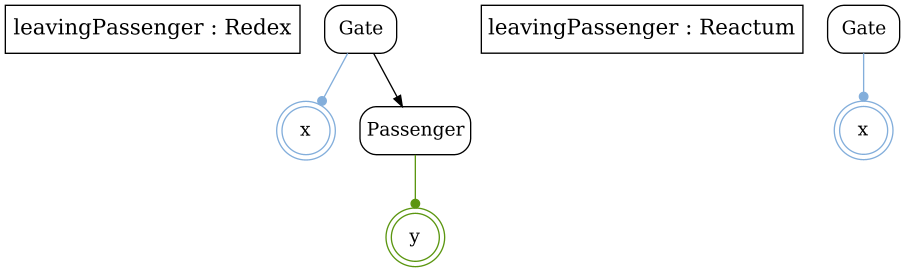

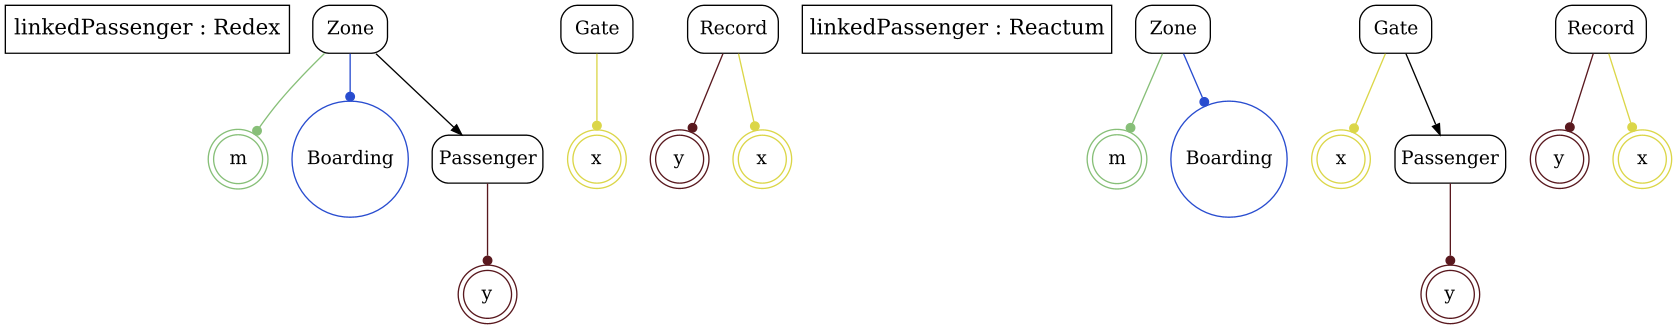

In [17]:
from IPython.display import Image
from os import listdir
rulepath = modelname+"/rules/"
if os.path.isdir(rulepath):
    for f in reversed(listdir(rulepath)):
        display(Image (modelname+"/rules/"+f))
else:
    print("No rules directory found")

## Transition Visualization  
  
Transition Graph is the output graph produced by the Bigraphical Reactive System Interpreter.

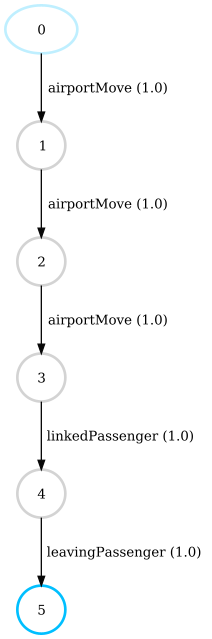

In [18]:
from IPython.display import Image
if os.path.isfile(modelname+"/tr_graph.png"):
    display(Image(modelname+"/tr_graph.png"))
else:
    print("No transition graph picture to show")

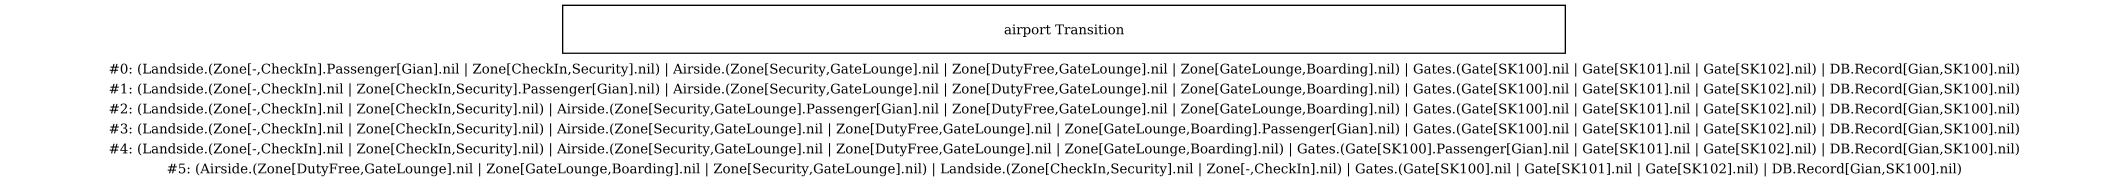

In [19]:
from IPython.display import Image
if os.path.isfile(modelname+"/tr_labels.png"):
    display(Image(modelname+"/tr_labels.png"))
else:
    print("No transition labels to show")